### Importar las librerias

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Preparación de los datos

In [26]:
# Preparación de los datos
# Cargar los datos desde el archivo CSV
data = pd.read_csv("HOG.csv")

# Dividir los datos en características (features) y etiquetas (labels)
X = data.drop("etiqueta", axis=1)  # Características
y = data["etiqueta"]  # Etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelo

In [27]:
# Parámetros
learning_rate = 0.01  # Tasa de aprendizaje
momentum_descent = 0.5  # Momentum
hidden_layers = (150,100,50)  # Número de capas ocultas y número de neuronas en cada capa
tolerance = 0.0001  # Parámetro de tolerancia
validation = 0.1  # Porcentaje de particiones para validación (0.1 = 10%  => 10 folds)

# Crear el clasificador MLP
mlp_classifier = MLPClassifier(
                        # No se cambian
                        max_iter = 3000,
                        solver = 'adam',
                        activation = 'logistic',
                        
                        #verbose=True, # Solo para ver los resultados en "tiempo real"

                        # Si cambian
                        validation_fraction = validation,
                        hidden_layer_sizes = hidden_layers,
                        tol = tolerance,
                        learning_rate_init = learning_rate,
                        momentum = momentum_descent,
                        )

# Entrenar el clasificador
mlp_classifier.fit(X_train_scaled, y_train)

# Obtener la exactitud del modelo en GENERAL
y_pred = mlp_classifier.predict(X_test_scaled)
# print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print(accuracy_score(y_test, y_pred))

0.5421875


### Overfitting o underfitting?

In [28]:
# Evaluar la precisión del modelo para ver si hay overfitting o underfitting
train_accuracy = mlp_classifier.score(X_train_scaled, y_train)
test_accuracy = mlp_classifier.score(X_test_scaled, y_test)

print(f"Precisión en el conjunto de entrenamiento: {train_accuracy}")
print(f"Precisión en el conjunto de prueba: {test_accuracy}")

Precisión en el conjunto de entrenamiento: 0.9828125
Precisión en el conjunto de prueba: 0.5421875


### Gráfica de pérdida

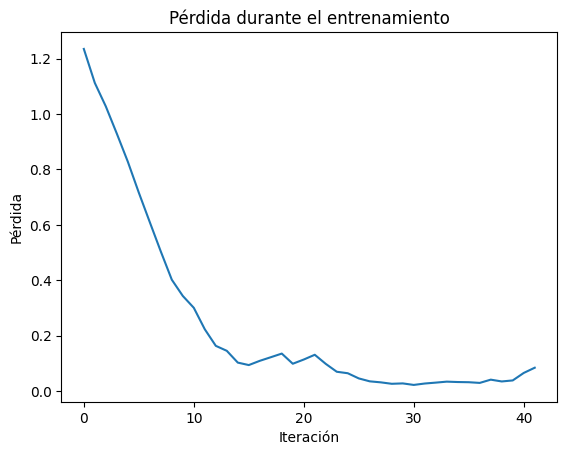

In [29]:
# Obtener la pérdida de cada iteración
loss_curve = mlp_classifier.loss_curve_

# Graficar la pérdida de cada iteración
plt.plot(loss_curve)
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Iteración')
plt.ylabel('Pérdida')
plt.show()

### Matriz de confusión

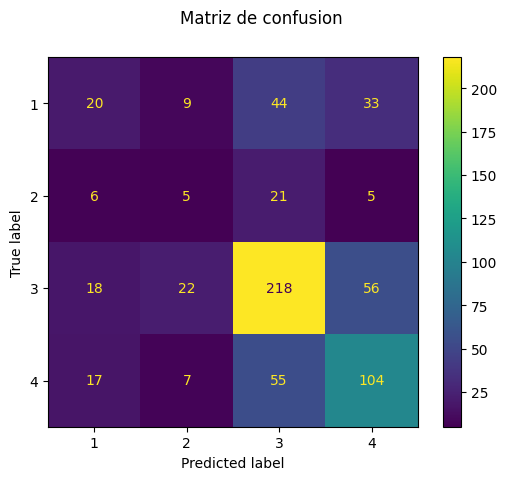

In [30]:
fig = ConfusionMatrixDisplay.from_estimator(mlp_classifier, X_test_scaled, y_test, display_labels=mlp_classifier.classes_)
fig.figure_.suptitle("Matriz de confusion")
plt.show()

### Un poco más de resultadossss

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.33      0.19      0.24       106
           2       0.12      0.14      0.12        37
           3       0.64      0.69      0.67       314
           4       0.53      0.57      0.55       183

    accuracy                           0.54       640
   macro avg       0.40      0.40      0.39       640
weighted avg       0.53      0.54      0.53       640

